In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the credit data
Columns we are keeping:

- userID: unique respondent in-survey identification number used to match respondents between different surveys

- date: data survey was conducted (2013 - 2024)

- N1_3: whether they possess student loan or not (1 for possess)

- N1_4: whether they possess home-based loan or not (1 for possess)

- N1_5: whether they possess auto-based loan or not (1 for possess)

- N1_6: whether they possess other personal loan or not (1 for possess)

- N2_1: current balance of credit card loans

- N2_3: current balance of student loans

- N10_7: Dollar amount granted by lender for student loan

- N15: Loan payments late by more than 30 days in past 12 months (1 for late payment)

- N16: Loan payments late by more than 90 days in past 12 months (1 for late payment)

- N17a_5: How likely will request credit card limit increase in next 12 months

- N22: Credit score (1 for below 620; 2 for 620 - 679; 3 for 680 - 719; 4 for 720 - 760; 5 for Above 760; 6 for don't know)

- N23: Last time checked credit score (1 for <1 mon; 2 for between 1 - 6 mon ago; 3 for 6-12 mon ago; 4 for 1-2 yrs ago; 5 for >2yrs ago; 6 for don't know)

- N25: Likelihood of being able to come up with $2000 in the next month given an unexpected need (0-100 percent)

In [2]:
inflation_df = pd.read_csv("potentialDataSetsHW2/us_inflation.csv")
interest_df = pd.read_csv("potentialDataSetsHW2/us_interest_rates.csv")
gdp_df = pd.read_csv("potentialDataSetsHW2/usa_gdp.csv")

In [3]:
inflation_df = inflation_df.dropna()
# have an "ave" (average) row per year with NaN values, so we dropped it
interest_df = interest_df.dropna()
gdp_df = gdp_df.iloc[:,1:].dropna()

In [4]:
gdp_df.head()
gdp_df = gdp_df.rename(columns={"date":"year"})

In [5]:
inflation_df['month_num'] = inflation_df['month_num'].astype(int)
inflation_df['date'] = inflation_df['year'].astype(str) + inflation_df['month_num'].apply(lambda x: f'{x:02d}')
inflation_df['date'] = inflation_df['date'].astype(str)
inflation_df.head()

,year,months,month_num,inflat_rate,date
0,1914,Jan,1,2.0,191401
1,1914,Feb,2,1.0,191402
2,1914,Mar,3,1.0,191403
3,1914,Apr,4,0.0,191404
4,1914,May,5,2.1,191405


In [6]:
interest_df['observation_date'] = pd.to_datetime(interest_df['observation_date'])
interest_df['date'] = interest_df['observation_date'].dt.strftime('%Y%m').astype(str)
interest_df.head()

,observation_date,months,month_num,interest_rate,date
0,1954-07-01 00:00:00+00:00,Jul,7,0.80,195407
1,1954-08-01 00:00:00+00:00,Aug,8,1.22,195408
2,1954-09-01 00:00:00+00:00,Sep,9,1.07,195409
3,1954-10-01 00:00:00+00:00,Oct,10,0.85,195410
4,1954-11-01 00:00:00+00:00,Nov,11,0.83,195411


In [7]:
credit_df = pd.read_excel("potentialDataSetsHW2/sce_credit.xlsx", sheet_name="Data")
"""
reduced_credit_df = credit_df[["userid", "date", "weight", 
                               "N1_3", "N1_4","N1_5","N1_6",
                               "N2_1", "N2_3",
                               "N10_7", "N15", "N16", "N17a_5",
                               "N22", "N23", "N25"]]
reduced_credit_df
"""

'\nreduced_credit_df = credit_df[["userid", "date", "weight", \n                               "N1_3", "N1_4","N1_5","N1_6",\n                               "N2_1", "N2_3",\n                               "N10_7", "N15", "N16", "N17a_5",\n                               "N22", "N23", "N25"]]\nreduced_credit_df\n'

In [15]:
credit_df['date'] = credit_df['date'].astype(str)
gdp_df['year'] = gdp_df['year'].astype(str)
credit_df['year'] = credit_df['date'].astype(str).str[:4]


In [16]:
df_merged = credit_df.merge(inflation_df[['date', 'inflat_rate']], on='date', how='left')
df_merged = df_merged.merge(interest_df[['date', 'interest_rate']], on='date', how='left')
df_final = df_merged.merge(gdp_df, on='year', how='left')

In [17]:
df_final.head()

,userid,date,weight,N1_1,N1_2,N1_3,N1_4,N1_5,N1_6,N1_7,...,N21_7,N22,N23,N24,N25,year,inflat_rate,interest_rate,gdp,gdp_cap
0,70000337,201310,5.382,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,2013,1.0,0.09,1.688068e+13,53409.750777
1,70000341,201310,0.557,1,1,1,0,1,0,0,...,98.0,NaN,NaN,NaN,NaN,2013,1.0,0.09,1.688068e+13,53409.750777
2,70003202,201310,0.868,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,2013,1.0,0.09,1.688068e+13,53409.750777
3,70003205,201310,0.422,1,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,2013,1.0,0.09,1.688068e+13,53409.750777
4,70003238,201310,0.638,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,2013,1.0,0.09,1.688068e+13,53409.750777


In [18]:
# can also do if you have a loan above a certain amount
df_final["loan_count"] = (df_final["N1_1"] + df_final["N1_2"] + df_final["N1_3"] + 
                          df_final["N1_4"] + df_final["N1_5"] + df_final["N1_6"])

(array([3096., 8540., 9957., 8118., 3621.,  886.,  144.]),
 array([0.        , 0.85714286, 1.71428571, 2.57142857, 3.42857143,
        4.28571429, 5.14285714, 6.        ]),
 <BarContainer object of 7 artists>)

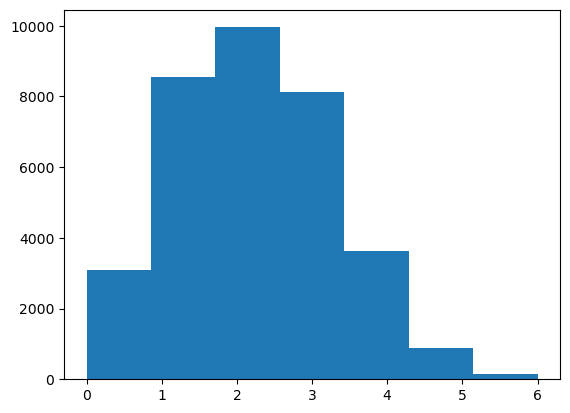

In [19]:
plt.hist(df_final["loan_count"], bins = 7)

In [20]:
df_final["loan_count"].quantile(0.8)

3.0

In [22]:
high_num_loans = df_final[(df_final["loan_count"]>=df_final["loan_count"].quantile(0.8))]
high_num_loans["N16"].value_counts()
# 0.43127 have late payment of over 90 days

N16
0.0    571
1.0    433
Name: count, dtype: int64

In [23]:
low_num_loans = df_final[(df_final["loan_count"]<=df_final["loan_count"].quantile(0.2))]
low_num_loans["N16"].value_counts()
# 0.47678 have late payment for over 90 days

N16
0.0    169
1.0    154
Name: count, dtype: int64

In [24]:
df_final["loan_count"].quantile(0.2)

1.0

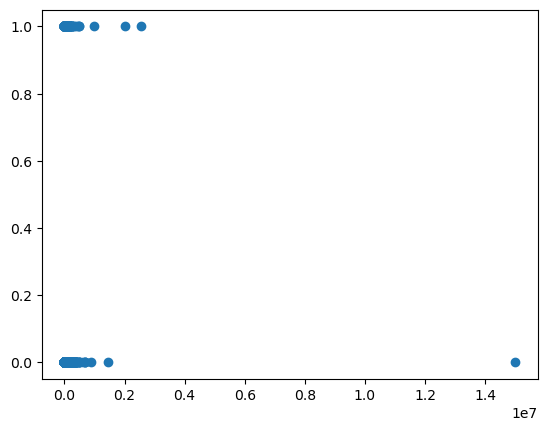

In [25]:
student_loaners = df_final[(df_final["N1_3"] == 1)]
plt.scatter(student_loaners["N2_3"], student_loaners["N15"])

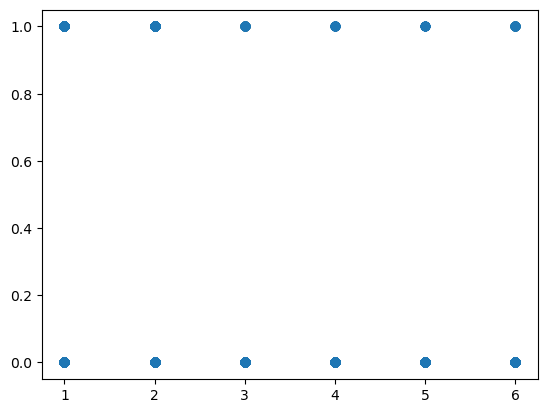

In [21]:
plt.scatter(student_loaners["N22"], student_loaners["N15"])

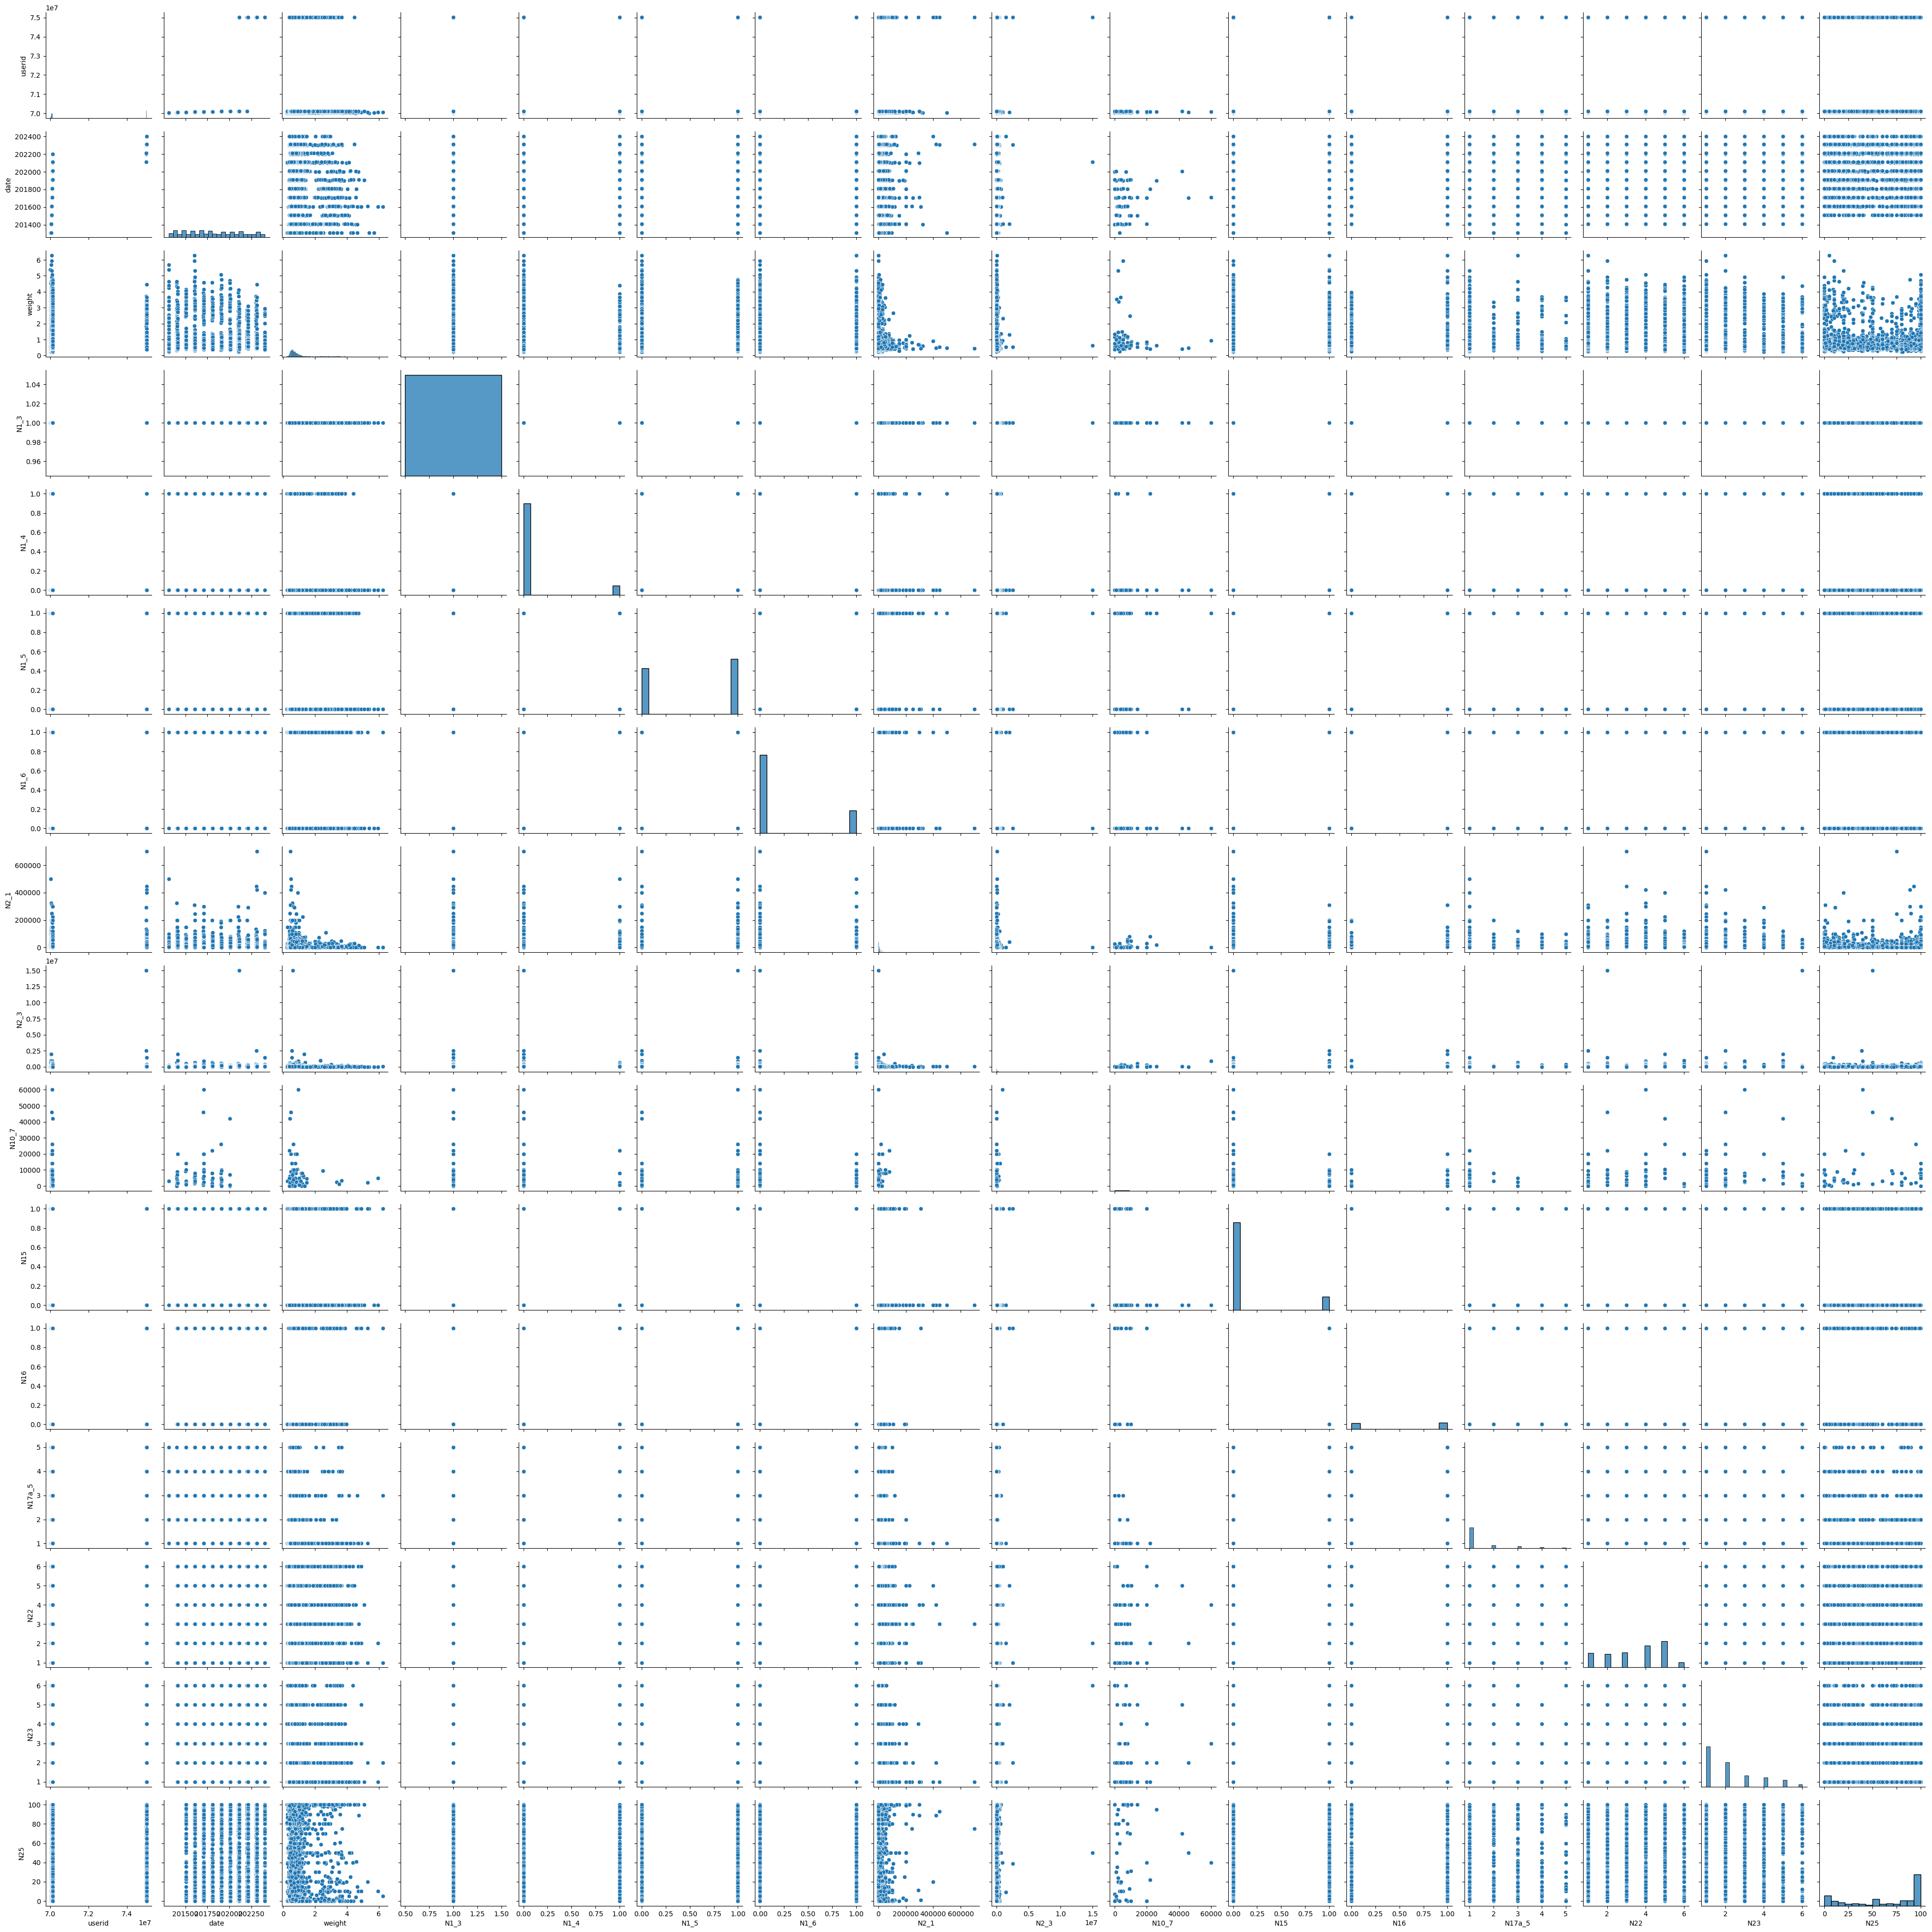

In [25]:
#reduced_student_loaners = reduced_credit_df[(reduced_credit_df["N1_3"] == 1)]
#sns.pairplot(reduced_student_loaners)

In [26]:
student_loaners.shape[0]

7909

In [27]:
student_loaners["N1_4"].value_counts()
#home-based loans

N1_4
0    7193
1     716
Name: count, dtype: int64

In [28]:
student_loaners["N1_5"].value_counts()
# auto loans

N1_5
1    4334
0    3575
Name: count, dtype: int64

In [32]:
student_loaners["N1_6"].value_counts()
# credit card loan

N1_6
0    6137
1    1772
Name: count, dtype: int64

In [33]:
student_loaners["N1_1"].value_counts()

N1_1
1    6310
0    1599
Name: count, dtype: int64

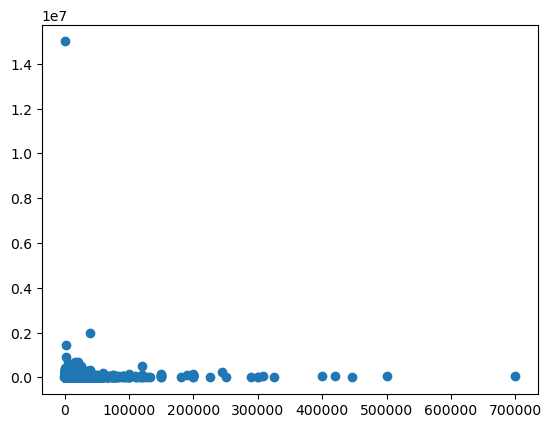

In [35]:
plt.scatter(student_loaners["N2_1"], student_loaners["N2_3"])

In [36]:
student_loaners[(student_loaners["N2_3"] > student_loaners["N2_3"].quantile(0.9))]

,userid,date,weight,N1_1,N1_2,N1_3,N1_4,N1_5,N1_6,N1_7,...,N21_3,N21_4,N21_5,N21_6,N21_7,N22,N23,N24,N25,year
30,70010752,201310,0.818000,1,1,1,0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
102,70015298,201310,0.436000,1,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
148,70016065,201310,0.540000,1,1,1,0,1,1,0,...,100.0,100.0,100.0,100.0,100.0,NaN,NaN,NaN,NaN,2013
353,70021651,201310,0.325000,1,1,1,0,1,0,0,...,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,2013
392,70021910,201310,0.558000,1,0,1,0,0,0,0,...,50.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34108,75015841,202402,0.462021,1,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,5.0,2.0,1.0,100.0,2024
34135,75015972,202402,0.397784,1,0,1,0,0,1,0,...,100.0,100.0,NaN,NaN,100.0,3.0,1.0,5.0,100.0,2024
34161,75016114,202402,0.543105,1,0,1,0,1,1,0,...,10.0,10.0,10.0,NaN,10.0,2.0,1.0,8.0,9.0,2024
34242,75016498,202402,0.593632,1,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,90.0,2.0,1.0,11.0,49.0,2024


In [38]:
student_loaners[(student_loaners["N2_3"] < student_loaners["N2_3"].quantile(0.1))]

,userid,date,weight,N1_1,N1_2,N1_3,N1_4,N1_5,N1_6,N1_7,...,N21_3,N21_4,N21_5,N21_6,N21_7,N22,N23,N24,N25,year
0,70000337,201310,5.382000,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
17,70009926,201310,0.622000,1,0,1,0,0,1,0,...,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,2013
27,70010326,201310,0.603000,1,1,1,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
58,70012979,201310,1.565000,1,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
64,70013091,201310,0.603000,1,1,1,0,1,1,0,...,NaN,NaN,NaN,NaN,80.0,NaN,NaN,NaN,NaN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34252,75016607,202402,0.992072,1,0,1,0,0,0,0,...,NaN,85.0,NaN,NaN,NaN,4.0,1.0,5.0,100.0,2024
34254,75016616,202402,0.713243,1,1,1,0,0,0,0,...,99.0,1.0,NaN,NaN,NaN,2.0,1.0,50.0,99.0,2024
34282,75016793,202402,0.841019,1,0,1,0,0,0,0,...,100.0,NaN,NaN,NaN,NaN,3.0,1.0,0.0,1.0,2024
34352,75017534,202402,0.449139,1,0,1,0,0,1,0,...,50.0,NaN,NaN,NaN,NaN,3.0,2.0,20.0,50.0,2024


In [37]:
print (student_loaners[(student_loaners["N2_3"] > student_loaners["N2_3"].quantile(0.9))]["weight"].mean())
print (student_loaners[(student_loaners["N2_3"] < student_loaners["N2_3"].quantile(0.1))]["weight"].mean())

# people who are part of lowest 10 quantile for student loan balance are weighted as one while
# those who are part of highest 10 quantile are weighted approximately 0.68

0.6845193340827783
1.0261252630911573


(array([1143.,    0., 1076.,    0., 1165.,    0., 1703.,    0., 2052.,
         418.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

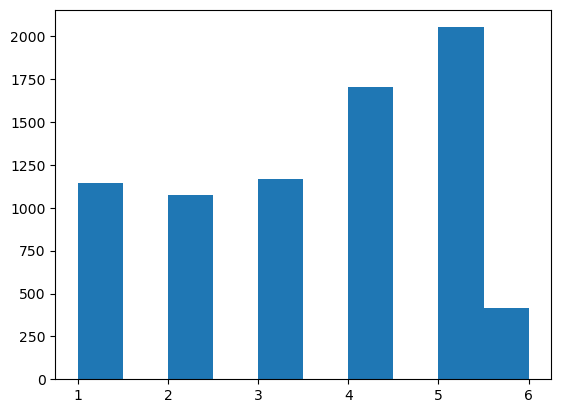

In [39]:
plt.hist(student_loaners["N22"])

In [40]:
student_loaners["N22"].mean()

3.4894799523620486

In [41]:
non_student_loaners = credit_df[(credit_df["N1_3"] == 0)]
non_student_loaners["N22"].mean()

4.248146395330494

(array([ 1690.,     0.,  1796.,     0.,  2325.,     0.,  4599.,     0.,
        12613.,  2333.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

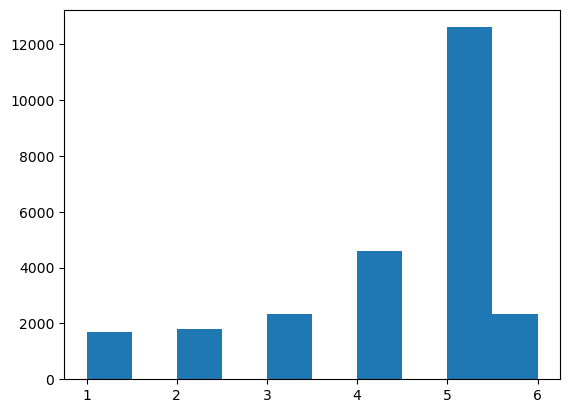

In [43]:
plt.hist(non_student_loaners["N22"])

In [4]:
#reduced_credit_df["year"] = reduced_credit_df["date"].astype(str).str[:4]

Importing the housing spending data
Columns we are keeping:

- userID: unique respondent in-survey identification number used to match respondents between different surveys

- date: data survey was conducted (2013 - 2024)

- qsp3_1: home appliance purchase during last 4 months (only have data from 2015 and on; house option added only Aug 2016)

- qsp3_2: electronics, computers, or cell phone purchase during last 4 months (only have data from 2015 and on; house option added only Aug 2016)

- qsp3_3: furniture purchase during last 4 months (only have data from 2015 and on; house option added only Aug 2016)

- qsp3_4: home repairs, improvements or renovations purchase during last 4 months (only have data from 2015 and on; house option added only Aug 2016)

- qsp3_5: cars/vehicle purchase during last 4 months (only have data from 2015 and on; house option added only Aug 2016)

- qsp3_6: trip/vacation purchase during last 4 months (only have data from 2015 and on; house option added only Aug 2016)

- qsp3_9: house/apartment purchase during last 4 months (only have data from 2015 and on; house option added only Aug 2016)

- qsp3_8: no large purchase during last 4 months (only have data from 2015 and on; house option added only Aug 2016)

- qsp5_1: proportion of current monthly salary on housing

- qsp5_2: proportion of current monthly salary on utilities

- qsp5_3: proportion of current monthly salary on food

- qsp5_4: proportion of current monthly salary on clothing, footwear, personal care

- qsp5_6: proportion of current monthly salary on transportion

- qsp5_7: proportion of current monthly salary on medical care

- qsp5_8: proportion of current monthly salary on education and child care

- qsp5_9: proportion of current monthly salary on other (gifts, child support, charity, etc.)

- qsp12_n: if get 10% more income, what they would do (3 for use all to pay debt; 5,6, 7 for use some to pay debt; 1, 2, 4 for use none for debt)

- qsp15new: variability in household income month to month (1 for <5%; 2 for 5%-15%; 3 for >15%)

- k2e: whether there exist a family budget (1 for yes)

In [29]:
hhspending_df = pd.read_excel("potentialDataSetsHW2/sce_household_spending.xlsx", sheet_name="Data")
reduced_hhspending_df = hhspending_df[["userid", "date", 
                                       "qsp3_1", "qsp3_2", "qsp3_3", "qsp3_4","qsp3_5","qsp3_6","qsp3_9","qsp3_8",
                                       "qsp5_1", "qsp5_2","qsp5_3","qsp5_4","qsp5_5", "qsp5_6", "qsp5_7", "qsp5_8", "qsp5_9",
                                       "qsp12n", "qsp15new", "k2e"]]
reduced_hhspending_df

,userid,date,qsp3_1,qsp3_2,qsp3_3,qsp3_4,qsp3_5,qsp3_6,qsp3_9,qsp3_8,...,qsp5_3,qsp5_4,qsp5_5,qsp5_6,qsp5_7,qsp5_8,qsp5_9,qsp12n,qsp15new,k2e
0,70041173,201412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,5.0,10.0,5.0,10.0,0.0,NaN,NaN,NaN,NaN
1,70041213,201412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,2.0,10.0,5.0,3.0,10.0,NaN,NaN,NaN,NaN
2,70041219,201412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,15.0,10.0,10.0,10.0,5.0,5.0,NaN,NaN,NaN,NaN
3,70041231,201412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,15.0,10.0,15.0,10.0,NaN,NaN,NaN,NaN,NaN
4,70041238,201412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28983,75012128,202304,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,20.0,5.0,5.0,10.0,10.0,0.0,15.0,7.0,1.0,1.0
28984,75012129,202304,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,20.0,20.0,10.0,10.0,0.0,0.0,0.0,7.0,1.0,1.0
28985,75012131,202304,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,10.0,5.0,10.0,0.0,5.0,0.0,0.0,7.0,1.0,2.0
28986,75012135,202304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,12.0,1.0,5.0,2.0,5.0,NaN,40.0,1.0,1.0,2.0


In [41]:
reduced_hhspending_df["date"] = reduced_hhspending_df["date"].astype(str)

/var/folders/zg/ls8bd3c56117c99w5bccvcjw0000gn/T/ipykernel_2461/2444849944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_hhspending_df["date"] = reduced_hhspending_df["date"].astype(str)


In [31]:
reduced_hhspending_df["userid"].value_counts()

userid
70111405    4
70111678    4
70110725    4
70110727    4
70111771    4
           ..
70097232    1
70097159    1
70097093    1
70097062    1
75012137    1
Name: count, Length: 13056, dtype: int64

In [34]:
reduced_hhspending_df[(reduced_hhspending_df["userid"]==70111678)]

,userid,date,qsp3_1,qsp3_2,qsp3_3,qsp3_4,qsp3_5,qsp3_6,qsp3_9,qsp3_8,...,qsp5_3,qsp5_4,qsp5_5,qsp5_6,qsp5_7,qsp5_8,qsp5_9,qsp12n,qsp15new,k2e
17824,70111678,201912,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,10.0,5.0,25.0,5.0,5.0,0.0,10.0,3.0,1.0,1.0
18521,70111678,202004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,10.0,2.0,15.0,5.0,5.0,0.0,8.0,6.0,1.0,2.0
19250,70111678,202008,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15.0,2.0,14.0,2.0,2.0,0.0,10.0,4.0,1.0,2.0
20099,70111678,202012,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,15.0,1.0,3.0,5.0,1.0,0.0,0.0,6.0,1.0,2.0


In [35]:
df_final[(df_final["userid"]==70111678)]

,userid,date,weight,N1_1,N1_2,N1_3,N1_4,N1_5,N1_6,N1_7,...,N22,N23,N24,N25,year,inflat_rate,interest_rate,gdp,gdp_cap,loan_count
22622,70111678,202002,0.468676,1,1,0,0,1,0,0,...,4.0,2.0,100.0,100.0,2020,2.3,1.58,2.135410e+13,64411.373178,3
23297,70111678,202006,0.341501,1,1,0,0,1,0,0,...,5.0,2.0,10.0,100.0,2020,0.6,0.08,2.135410e+13,64411.373178,3
23994,70111678,202010,0.398066,1,1,0,0,1,0,0,...,5.0,3.0,0.0,99.0,2020,1.2,0.09,2.135410e+13,64411.373178,3


In [42]:
df_merged = df_final.merge(reduced_hhspending_df, on=["userid", "date"], how="left")

In [43]:
df_merged

,userid,date,weight,N1_1,N1_2,N1_3,N1_4,N1_5,N1_6,N1_7,...,qsp5_3,qsp5_4,qsp5_5,qsp5_6,qsp5_7,qsp5_8,qsp5_9,qsp12n,qsp15new,k2e
0,70000337,201310,5.382000,0,0,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,70000341,201310,0.557000,1,1,1,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,70003202,201310,0.868000,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,70003205,201310,0.422000,1,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,70003238,201310,0.638000,0,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34357,75017565,202402,0.741707,1,1,1,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34358,75017580,202402,1.262060,1,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34359,75017584,202402,1.467306,1,0,1,0,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34360,75017586,202402,0.545003,1,1,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
student_loaners = df_merged[(df_merged["N1_3"] == 1)]

Importing Job and Income Data

Columns we want to keep:

- userid: Unique identifier

- date: date survey was conducted (2014 and on)

- l3: annual salary before tax and deductions (including bonuses, overtime, tips/commissions)

- l7dk_1: never had a paying job (1 for never; empty for having a paying job)



In [7]:
""" job_df = pd.read_excel("potentialDataSetsHW2/sce_labor.xlsx", sheet_name="Data")
reduced_labor_df = job_df[["userid", "date", 
                                       "l3", "l7dk_1"]]
reduced_labor_df """

' job_df = pd.read_excel("potentialDataSetsHW2/sce_labor.xlsx", sheet_name="Data")\nreduced_labor_df = job_df[["userid", "date", \n                                       "l3", "l7dk_1"]]\nreduced_labor_df '

In [8]:
#reduced_labor_df["year"] = reduced_labor_df["date"].astype(str).str[:4]

Importing household status

Columns we want to keep:

- userid

- date

- a1new: current living situation (1 for married; 2 for separated; 3 for divorced; 4 for widowed; 5 for never married)

- b1_1: household income

- b5_1: Percentage change in HH income last 12 mos. vs. previous year

- i1_6: Disabled

In [9]:
""" hhfinance_df = pd.read_excel("potentialDataSetsHW2/sce_household_finance.xlsx", sheet_name="Data")
reduced_hhfinance_df = hhfinance_df[["userid", "date", 
                                       "a1new", "b1_1", "b5_1", "i1_6"]]
reduced_hhfinance_df """

' hhfinance_df = pd.read_excel("potentialDataSetsHW2/sce_household_finance.xlsx", sheet_name="Data")\nreduced_hhfinance_df = hhfinance_df[["userid", "date", \n                                       "a1new", "b1_1", "b5_1", "i1_6"]]\nreduced_hhfinance_df '

In [10]:
#reduced_hhfinance_df["year"] = reduced_hhfinance_df["date"].astype(str).str[:4]

In [11]:
""" reduced_credit_df.set_index(["userid", "date"], inplace = True)
reduced_hhspending_df.set_index(["userid", "date"], inplace = True)
reduced_labor_df.set_index(["userid", "date"], inplace = True)
reduced_hhfinance_df.set_index(["userid", "date"], inplace = True) """

' reduced_credit_df.set_index(["userid", "date"], inplace = True)\nreduced_hhspending_df.set_index(["userid", "date"], inplace = True)\nreduced_labor_df.set_index(["userid", "date"], inplace = True)\nreduced_hhfinance_df.set_index(["userid", "date"], inplace = True) '

In [12]:
""" joined_df = reduced_credit_df.join(reduced_hhspending_df, how = "inner") """

' joined_df = reduced_credit_df.join(reduced_hhspending_df, how = "inner") '

In [13]:
""" common_index = set(reduced_credit_df.index) & \
               set(reduced_hhfinance_df.index) 

print(f"Number of common (userid, date): {len(common_index)}") """

' common_index = set(reduced_credit_df.index) &                set(reduced_hhfinance_df.index) \n\nprint(f"Number of common (userid, date): {len(common_index)}") '

N1 (keep separate), N2 (keep separate), N10 (plot between $ granted and maybe current balance?), N22, N23, N25, qsp5, qsp14new, k2e

Waitlist: N3, N4_4, N4_5, N4_6, Qsp12n, qsp13a

In [ ]:
"""
hhspending_df = pd.read_excel("potentialDataSetsHW2/sce_household_spending.xlsx", sheet_name="Data")
reduced_hhspending_df = hhspending_df[["userid", "date", 
                                       "qsp5_1", "qsp5_2","qsp5_3","qsp5_4",
                                       "qsp5_5", "qsp5_6", "qsp5_7", "qsp5_8",
                                       "qsp12n", "qsp13a_1", "qsp13a_2", "qsp13a_3",
                                       "qsp14new", "qsp15new", "k2e"]]
reduced_hhspending_df
reduced_hhspending_df["date"] = reduced_hhspending_df['date'].astype(str)
df_merged = df_final.merge(reduced_hhspending_df, on=["userid", "date"], how="left")
"""
"""
df_merged_reduced = df_merged[["userid", "date", "weight", 
                               "N1_1", "N1_2", "N1_3", 
                               "N1_4","N1_5","N1_6",
                               "N2_1","N2_2", "N2_3",
                               "N2_4", "N2_5", "N2_6","N22", "N23", "N25",
                               "qsp5_1", "qsp5_2","qsp5_3","qsp5_4",
                                       "qsp5_5", "qsp5_6", "qsp5_7", "qsp5_8",
                                       "qsp14new", "qsp15new", "k2e"]]
df_merged.isna().sum()
"""